In [7]:
import os
from mdagent import MDAgent

In [8]:
prompt13 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [9]:
agent.run(prompt13)

Thought: To simulate 1L6X at different pH values and analyze the SASA and RMSF, I will first need to download the PDB file. Then I can use the SetUpandRunFunction tool to set up and run simulations at pH 5.0 and 8.8. Finally, I can use the SolventAccessibleSurfaceArea and ComputeRMSF tools to analyze the trajectories.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1L6X"
}
```

PDB file found with this ID: 1L6X
Here are the next steps to continue the analysis:

Thought: Now that I have the PDB file, I can set up and run simulations at pH 5.0 and 8.8 using the SetUpandRunFunction tool. I'll start with pH 5.0.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1L6X_155142",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [10]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_76
Files found in registry: 1L6X_155142: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_155142
 1L6X_155207: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 5.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_155218: Initial positions for simulation sim0_155218
 sim0_155218: Basic Simulation of Protein 1L6X_155207
 rec0_155227: Simulation trajectory for protein 1L6X_155207 and simulation sim0_155218
 rec1_155227: Simulation state log for protein 1L6X_155207 and simulation sim0_155218
 rec2_155227: Simulation pdb frames for protein 1L6X_155207 and simulation sim0_155218
 sasa_1L6X: Total SASA values for 1L6X
 fig0_002332: Plot of SASA over time for 1L6X
 rmsf_1L6X: RMSF for 1L6X
 fig0_002340: RMSF plot for 1L6X
 1L6X_002351: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 8.8. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_00

In [11]:
import re
import os
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)

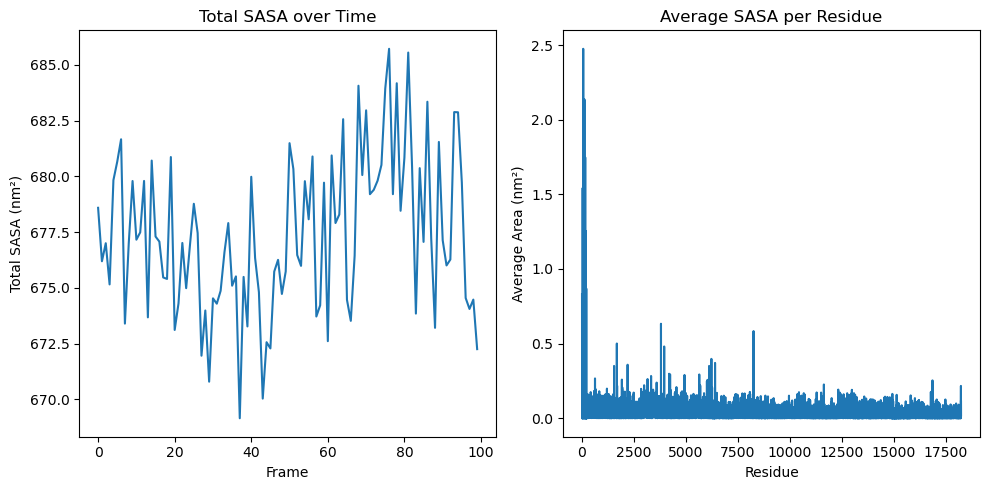

In [12]:
file_id1 = matches[0]
path1 = registry.get_mapped_path(file_id1)
assert os.path.exists(path1), "Path does not exist"
Image(filename=path1)

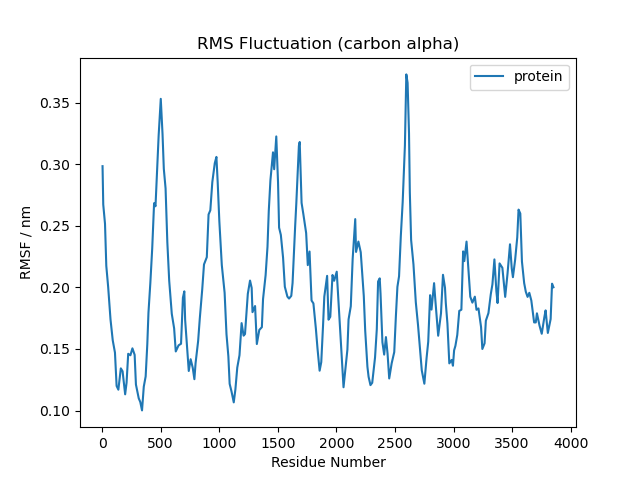

In [13]:
file_id2 = matches[1]
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path2), "Path does not exist"
Image(filename=path2)